# 实现自动求导

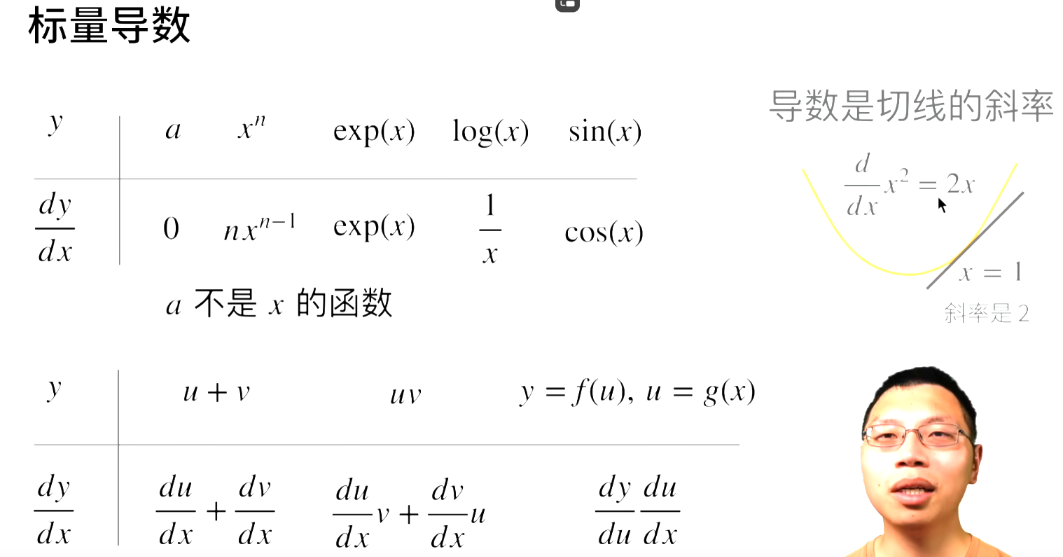

In [1]:
#导入第三方库
import torch

In [2]:
x = torch.arange(4.0)
x 

tensor([0., 1., 2., 3.])

In [7]:
#假设我们想对函数y = 2x^Tx关于列向量x求导 在计算梯度之前，需要存储梯度
x.requires_grad_(True) #等价于torch.arange(4.0, requires_grad= True)
x.grad
#计算y = 2x^Tx
y = 2* torch.dot(x, x)
print(y)
#通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward()
x.grad

tensor(28., grad_fn=<MulBackward0>)


tensor([ 0., 12., 24., 36.])

In [10]:
#现在计算x的另一个函数
#默认情况下，pytorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [11]:
#深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
#对非标量调用“backward”需要传入一个‘gradient’参数，用于指定微分函数
x.grad.zero_()
y =  x * x
y.sum().backward() #等价于y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [14]:
x.grad.zero_()
y = x * x
#将y变为一个与x无关的常数赋值给u,常用于在网络中固定参数
u = y.detach()
z = u * x
z.sum().backward()
print(x.grad == u)

x.grad.zero_()
y.sum().backward()
print(x.grad == 2 * x)

tensor([True, True, True, True])
tensor([True, True, True, True])


In [18]:
#即使构建函数的计算图需要通过python控制流(例如，条件、循环或任意函数调用)，我们仍然可以计算得到变量的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
#生成一个标量 size参数设置为空，即为标量
a = torch.randn(size= (), requires_grad= True)
print(a.shape)
d = f(a)
d.backward()
print(a.grad)
a.grad == d / a

torch.Size([])
tensor(4096.)


tensor(True)